---

## **<font color="Dodgerblue"> Modelación Climática Tropical</font>**
### **<font color="Steelblue"> Mapa de coeficientes de regresión para la precipitación en JJAS con GPCC</font>**


---

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.util import add_cyclic_point
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from scipy import stats
from scipy.stats import t

In [6]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=10)

In [7]:
def mapa_MC(data, levels, ccmap, titulo, extend='max', cbarlabel="Coeficiente de regresión", 
            limite_NS=75, lon_min=None, lon_max=None, lat_min=None, lat_max=None):
    lons, lats = data.lon, data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    fig = plt.figure(figsize=(12, 11))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    cs = ax.contourf(lon, lats, data, levels=levels, cmap=ccmap, extend=extend, transform=ccrs.PlateCarree())

    # Definimos la extensión del mapa
    if lon_min is not None and lon_max is not None and lat_min is not None and lat_max is not None:
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    else:
        ax.set_extent([0, 359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.5)
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 15}
    gl.ylabel_style = {'size': 15}
    plt.title(titulo, fontsize=18)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

In [8]:
# Archivo de precipitación GPCC
filename='/home/jovyan/ModClim/datos_actualizados/precip.comb.v2020to2019-v2020monitorafter.total.nc'
ds=xr.open_dataset(filename)
pr=ds['precip']
pr

<xarray.DataArray 'precip' (time: 1610, lat: 180, lon: 360)> Size: 417MB
[104328000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 13kB 1891-01-01 1891-02-01 ... 2025-02-01
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes:
    long_name:     GPCC Monthly total of precipitation
    statistic:     Total
    valid_range:   [   0. 8000.]
    parent_stat:   Observations
    var_desc:      Precipitation
    units:         mm
    level:         Surface
    dataset:       GPCC Precipitation 1.0degree V2020 Full Reanalysis
    actual_range:  [   0.   4830.39]

In [9]:
pr.units

'mm'

In [10]:
# Convertimos unidades
pr=pr/30.5
pr['units']='mm day-1'

In [11]:
pr.units

<xarray.DataArray 'units' ()> Size: 32B
array('mm day-1', dtype='<U8')
Coordinates:
    units    <U8 32B 'mm day-1'

In [12]:
pr.time

<xarray.DataArray 'time' (time: 1610)> Size: 13kB
array(['1891-01-01T00:00:00.000000000', '1891-02-01T00:00:00.000000000',
       '1891-03-01T00:00:00.000000000', ..., '2024-12-01T00:00:00.000000000',
       '2025-01-01T00:00:00.000000000', '2025-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 13kB 1891-01-01 1891-02-01 ... 2025-02-01
    units    <U8 32B 'mm day-1'
Attributes:
    long_name:           Time
    delta_t:             0000-01-00 00:00:00
    avg_period:          0000-01-00 00:00:00
    standard_name:       time
    axis:                T
    coordinate_defines:  start
    actual_range:        [33237. 82211.]

In [13]:
pr_years = pr.sel(time=slice('1982', '2024'))

In [14]:
pr_years.time

<xarray.DataArray 'time' (time: 516)> Size: 4kB
array(['1982-01-01T00:00:00.000000000', '1982-02-01T00:00:00.000000000',
       '1982-03-01T00:00:00.000000000', ..., '2024-10-01T00:00:00.000000000',
       '2024-11-01T00:00:00.000000000', '2024-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2024-12-01
    units    <U8 32B 'mm day-1'
Attributes:
    long_name:           Time
    delta_t:             0000-01-00 00:00:00
    avg_period:          0000-01-00 00:00:00
    standard_name:       time
    axis:                T
    coordinate_defines:  start
    actual_range:        [33237. 82211.]

In [15]:
jjas = pr_years.where((pr_years.time.dt.month >= 6) & (pr_years.time.dt.month <= 9), drop=True)

In [16]:
mean_jjas = jjas.mean('time')

In [17]:
mean_jjas

<xarray.DataArray 'precip' (lat: 180, lon: 360)> Size: 259kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    units    <U8 32B 'mm day-1'

In [18]:
print(mean_jjas.min())
print(mean_jjas.max())

<xarray.DataArray 'precip' ()> Size: 4B
array(1.1437285e-05, dtype=float32)
Coordinates:
    units    <U8 32B 'mm day-1'
<xarray.DataArray 'precip' ()> Size: 4B
array(37.69598, dtype=float32)
Coordinates:
    units    <U8 32B 'mm day-1'


### **<font color="Steelblue"> Código de la serie de tiempo en el centro de México.</font>** 

In [19]:
# Asignamos pesos con la función coseno
lats = pr_years.lat
weights = np.cos(np.deg2rad(lats))
weights.name = "weights"

In [20]:
# Aplicamos el peso y luego el promedio espacial
pr_weighted = pr_years.weighted(weights)
pr_meanglobal = pr_weighted.mean(dim=['lat', 'lon'])

In [21]:
# Ubicación centro-sur
centrolat=pr_years.sel(lat=slice(33.25,9.25))
centrolon=centrolat.sel(lon=slice(242.75,275.75))

centrolon=centrolon.where(centrolon<1e10,drop=True)
centro_peso=centrolon.weighted(weights)
prcentro=centrolon.mean(["lon","lat"])
pr_annual2=prcentro.resample(time='1Y').mean() # resampleamos a escala anual
#pr_annual2.to_netcdf('GPCC_serie.nc')

/opt/conda/lib/python3.11/site-packages/xarray/groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


In [22]:
years=np.arange(1982,2025)

In [23]:
mean_precipitation_obs = pr_annual2.groupby('time.year').mean(dim='time').values

In [24]:
X2=years
y2=mean_precipitation_obs

In [25]:
# Calculamos la pendiente (beta1) y la intersección en el eje y (beta0)
m2 = np.sum((X2 - np.mean(X2)) * (y2 - np.mean(y2))) / np.sum((X2 - np.mean(X2))**2)
b2 =  np.mean(y2) - m2 * np.mean(X2)

In [26]:
# Ecuación de regresión lineal simple
predicciones2= b2 + m2 * X2

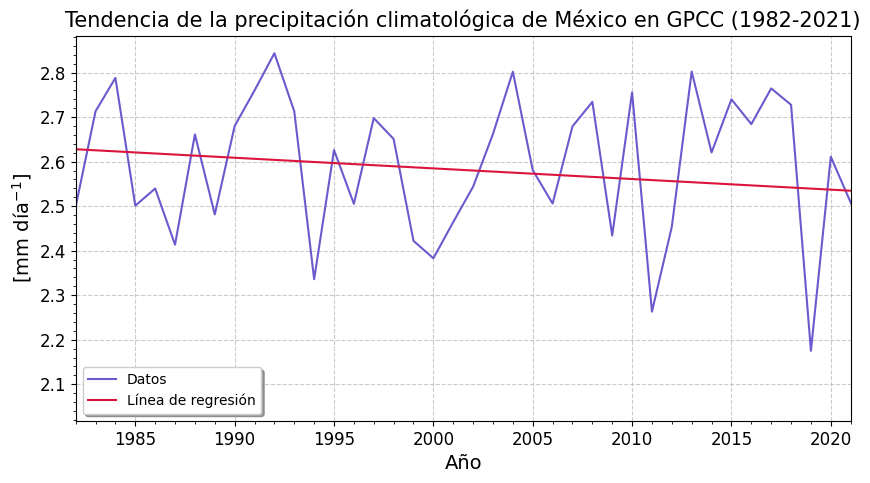

In [27]:
# Graficamos los datos y la línea de la ec. de regresión
plt.figure(figsize=(10,5))
plt.plot(X2, y2, color='slateblue', label='Datos')
plt.plot(X2, predicciones2, color='crimson', label='Línea de regresión')
lineplot_setup(1982,2021,'Año','[mm día$^{-1}$]',title='Tendencia de la precipitación climatológica de México en GPCC (1982-2021)',legend=True)
#grafico_linea_ts(1982,2021,'Año','Precipitación [mm día$^{-1}$]','Serie de tiempo de la precipitación climatológica de México en GPCC (1982-2021)',legend=True)

### **<font color="Steelblue"> El siguiente es seleccionando el centro de México.</font>** 

In [28]:
jjas2 = pr_years.where((pr.time.dt.month >= 6) & (pr.time.dt.month <= 9), drop=True)

In [29]:
jjas2.lon

<xarray.DataArray 'lon' (lon: 360)> Size: 1kB
array([  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5], dtype=float32)
Coordinates:
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    units    <U8 32B 'mm day-1'
Attributes:
    long_name:           Longitude
    units:               degrees_east
    standard_name:       longitude
    actual_range:        [  0.5 359.5]
    axis:                X
    coordinate_defines:  point

In [30]:
# Seleccionamos el área mexico para ver los coeficientes en todo el mapa
#area = jjas2.sel(lat=slice(33.75,10.25))
#arealon = area.sel(lon=slice(241.75,276.5))
# Guardar los datos sub-seleccionados JJAS en un archivo NetCDF
#arealon.to_netcdf('GPCCV4_JJAS_actualizado.nc')

In [31]:
# Seleccionamos el área centro-sur
area = jjas2.sel(lat=slice(23.75,13.75))
arealon = area.sel(lon=slice(253.75,273.5))

# Guardar los datos sub-seleccionados JJAS en un archivo NetCDF
#arealon.to_netcdf('GPCCV3_JJAS.nc')

In [32]:
arealon=arealon.where(arealon<1e10,drop=True)

In [33]:
mean_precipitation_obs = arealon.groupby('time.year').mean(dim='time').mean(dim=['lat', 'lon']).values

In [34]:
# aqui se puede invertir el orden de la latitud (pero ya lo hicimos hace 3 celdas)
jjas2.reindex(lat=list(reversed(jjas.lat)))

<xarray.DataArray 'precip' (time: 172, lat: 180, lon: 360)> Size: 45MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1kB 1982-06-01 1982-07-01 ... 2024-09-01
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    units    <U8 32B 'mm day-1'

In [35]:
years = np.arange(1982, 2025)

In [36]:
print(len(years), len(mean_precipitation_obs))

43 43


In [37]:
mean_precipitation_obs

array([5.473076 , 6.6272893, 7.867745 , 6.230535 , 5.624779 , 6.4175653,
       7.9583282, 6.5111384, 6.2475224, 5.9395194, 6.43353  , 7.514148 ,
       5.288616 , 7.3948445, 6.5197783, 5.7592745, 6.852931 , 7.668008 ,
       6.558568 , 5.9626365, 6.5019374, 6.8853693, 6.0764146, 6.9879346,
       6.540943 , 6.9715967, 7.671423 , 5.658064 , 8.646006 , 7.149702 ,
       6.6501184, 7.686198 , 6.3513565, 5.39949  , 6.7833815, 7.5865297,
       6.0758405, 5.0431848, 6.565347 , 6.4015217, 6.5552278, 4.8764105,
       7.5021963], dtype=float32)

In [38]:
X2=years
y2=mean_precipitation_obs
#np.save('serie_pr_GPCC.npy',y2)

In [39]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [40]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# Hacemos la prueba con Ordinary Least Squares - obtenido de: https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html 
X = sm.add_constant(X2)  
modelo = sm.OLS(y2, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                  0.004657
Date:                Sat, 15 Nov 2025   Prob (F-statistic):              0.946
Time:                        23:51:53   Log-Likelihood:                -52.800
No. Observations:                  43   AIC:                             109.6
Df Residuals:                      41   BIC:                             113.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0122     20.824      0.385      0.7

In [42]:
# Hacemos la prueba de Bresuch-Pagan, obtenida de: https://www.statology.org/breusch-pagan-test-python/
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(modelo.resid, modelo.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', np.float64(0.6021015592099237)),
 ('p-value', np.float64(0.4377773076084359)),
 ('f-value', np.float64(0.5822497066000075)),
 ('f p-value', np.float64(0.4498002193077755))]

In [43]:
# Calcularemos la pendiente (beta1) y la intersección en el eje y (beta0)
m2 = np.sum((X2 - np.mean(X2)) * (y2 - np.mean(y2))) / np.sum((X2 - np.mean(X2))**2)
b2 =  np.mean(y2) - m2 * np.mean(X2)
m2_siglo=m2*100
m2_siglo
#np.save('pendiente_GPCC.npy',m2_siglo)

np.float64(-0.07094920707663464)

In [44]:
print(f'Pendiente (beta 1): {m2}')
print(f'Pendiente (beta 1 * 100): {m2_siglo}')
print(f'Ordenada al origen (beta 0): {b2}')

Pendiente (beta 1): -0.0007094920707663464
Pendiente (beta 1 * 100): -0.07094920707663464
Ordenada al origen (beta 0): 8.01218279291589


In [45]:
# Ec. de regresión lineal
predicciones2= b2 + m2 * X2
#np.save('predicciones_GPCC.npy', predicciones2)

In [46]:
# Imprimimos los valores del modelo de regresión (ver pvalues)
res = stats.linregress(X2, y2)
print(res)

LinregressResult(slope=np.float64(-0.0007094920707663455), intercept=np.float64(8.012182792915889), rvalue=np.float64(-0.010657407624678391), pvalue=np.float64(0.9459226815029189), stderr=np.float64(0.010396313706348439), intercept_stderr=np.float64(20.82421600857061))


In [47]:
# Otra forma de imprimir los pvalues
print(f"valor P: {res.pvalue:.5f}")

valor P: 0.94592


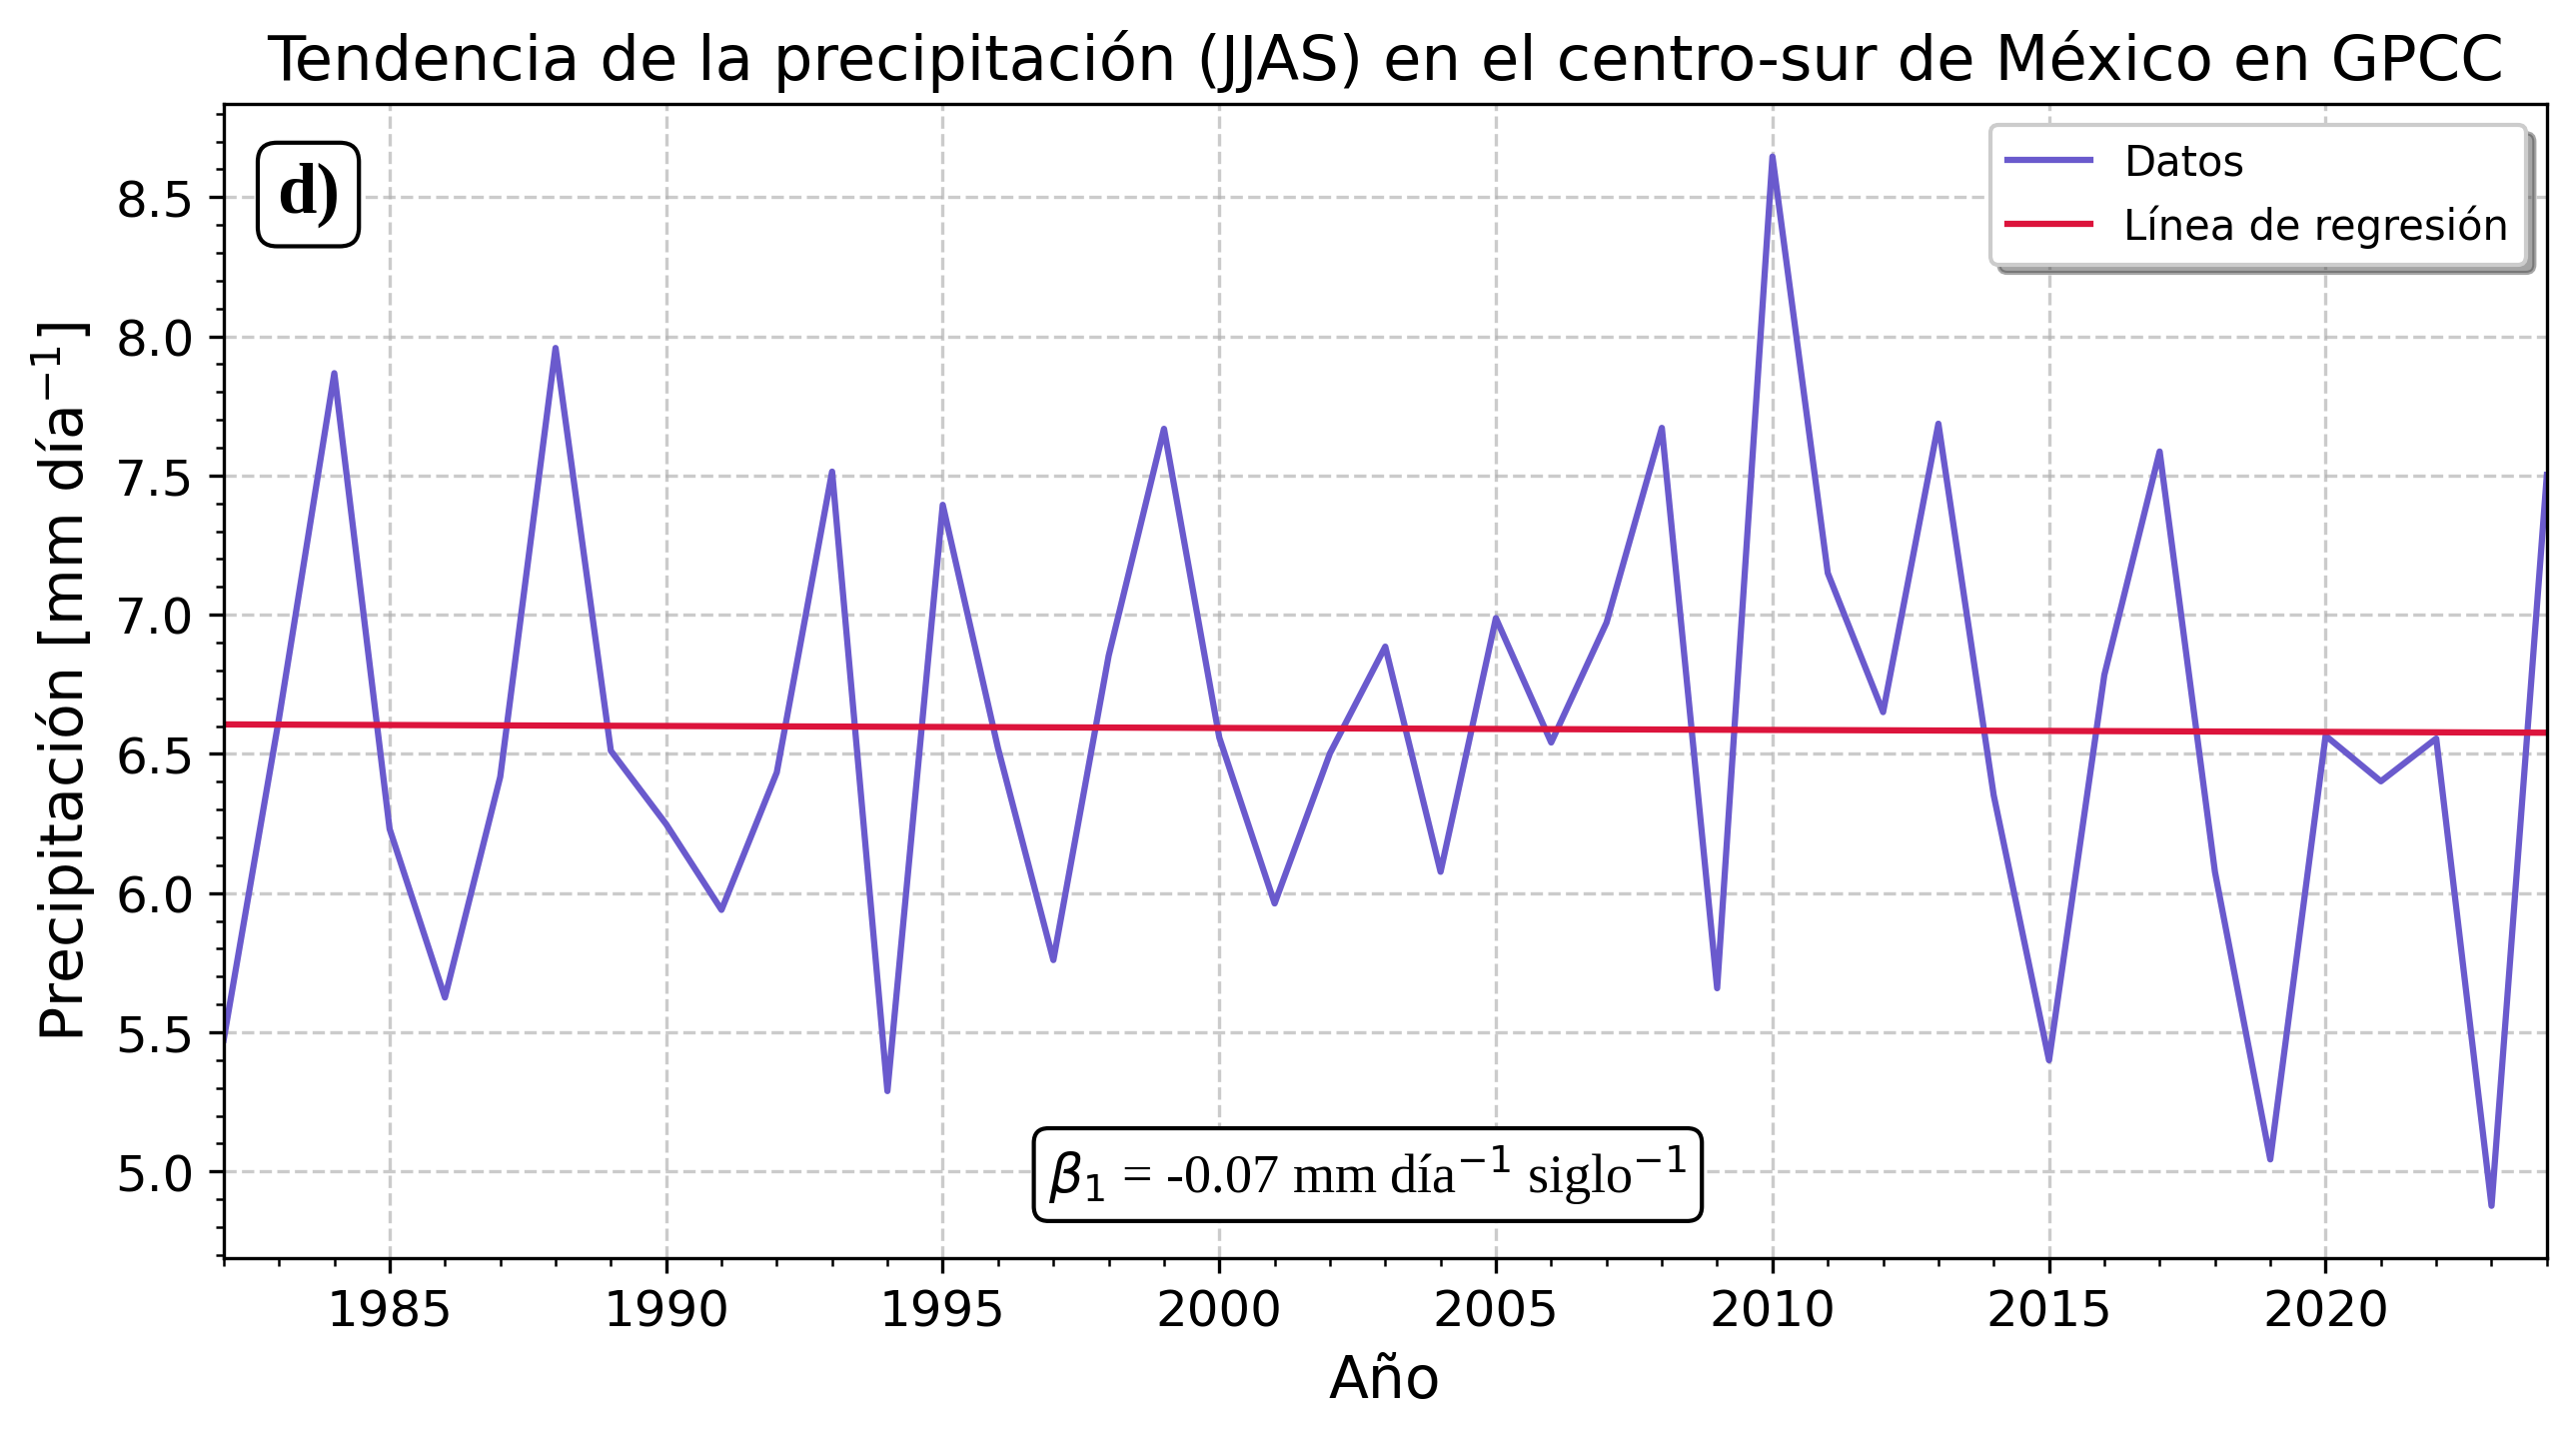

In [48]:
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D

# Graficamos los datos y la línea de regresión
plt.figure(figsize=(10,5), dpi=300)
plt.plot(X2, y2, color='slateblue', label='Datos')
plt.plot(X2, predicciones2, color='crimson', label='Línea de regresión')
plt.text(0.05, 0.95, 'd)', transform=plt.gca().transAxes, fontsize=17, fontname='Liberation Serif', fontweight='bold', va='top', ha='right',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.27', linewidth=1))
lineplot_setup(1982,2024,'Año','Precipitación [mm día$^{-1}$]',title='Tendencia de la precipitación (JJAS) en el centro-sur de México en GPCC',legend=True)

plt.text(0.63, 0.1, r'$\beta_1$ = -0.07 mm día$^{-1}$ siglo$^{-1}$', transform=plt.gca().transAxes, fontsize=13, fontname='Liberation Serif', fontweight='normal', va='top', ha='right',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.27', linewidth=1))

ax = plt.gca()  
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))  # Intervalo de 0.5 en 0.5

### **<font color="Steelblue"> Matriz de coeficientes de regresión seleccionando el centro de México.</font>** 

In [49]:
# hacemos una funcion para los coeficientes de regresión
def reg_coef(X,y):
    m=np.sum((X - np.mean(X)) * (y - np.mean(y))) / np.sum((X - np.mean(X))**2)
    b = np.mean(y) - m * np.mean(X)
    return m,b

# Se inicializa la matriz
coef_matriz_m = np.zeros((len(arealon.lat), len(arealon.lon)))
coef_matriz_b = np.zeros((len(arealon.lat), len(arealon.lon)))

for i, lat in enumerate(arealon.lat):
    for j, lon in enumerate(arealon.lon):
        # Calculamos los coeficientes de regresión
        y = arealon.sel(lat=lat, lon=lon).groupby('time.year').mean(dim='time').values
        X = years
        m,b = reg_coef(X,y)
        
        # Guardamos m en la matriz 
        coef_matriz_m[i, j] = m
        coef_matriz_b[i, j] = b

In [50]:
print(coef_matriz_m)

[[-0.00277398  0.00022295 -0.00912972  0.00426942  0.01239418  0.01469533
   0.01048602  0.01341974  0.01947432         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan]
 [ 0.01776335 -0.00652164 -0.00041215  0.01046553  0.00988242  0.01150432
   0.01227491  0.00177041 -0.00613609         nan         nan         nan
          nan         nan  0.00513814         nan         nan         nan
          nan         nan]
 [ 0.0025262   0.00235019  0.0127481   0.00498024  0.01221246  0.01791587
   0.00534105 -0.00836542 -0.00146026         nan         nan         nan
          nan         nan         nan  0.00552446  0.0047138   0.04510144
   0.03687062  0.01754868]
 [ 0.01177916  0.01191458  0.02240615  0.0075987   0.01334498  0.00895869
  -0.00416406 -0.0979176  -0.04477995  0.00045749         nan         nan
          nan         nan  0.00019148  0.01132208  0.00758219  0.04086152
   0.02915538  0.00819538]
 [ 0

In [51]:
print(i, j, lon, lat) 

9 19 <xarray.DataArray 'lon' ()> Size: 4B
array(273.5, dtype=float32)
Coordinates:
    lon      float32 4B 273.5
    units    <U8 32B 'mm day-1'
Attributes:
    long_name:           Longitude
    units:               degrees_east
    standard_name:       longitude
    actual_range:        [  0.5 359.5]
    axis:                X
    coordinate_defines:  point <xarray.DataArray 'lat' ()> Size: 4B
array(14.5, dtype=float32)
Coordinates:
    lat      float32 4B 14.5
    units    <U8 32B 'mm day-1'
Attributes:
    units:               degrees_north
    actual_range:        [-89.5  89.5]
    long_name:           Latitude
    standard_name:       latitude
    axis:                Y
    coordinate_defines:  point


In [52]:
print(coef_matriz_m.shape)  
print(len(arealon.lat), len(arealon.lon))  

(10, 20)
10 20


plt.contourf(coef_matriz_m)

In [53]:
print(np.nanmin(coef_matriz_m), np.nanmax(coef_matriz_m))

-0.09791759867136733 0.04910735963730969


In [54]:
import matplotlib.patches as patches

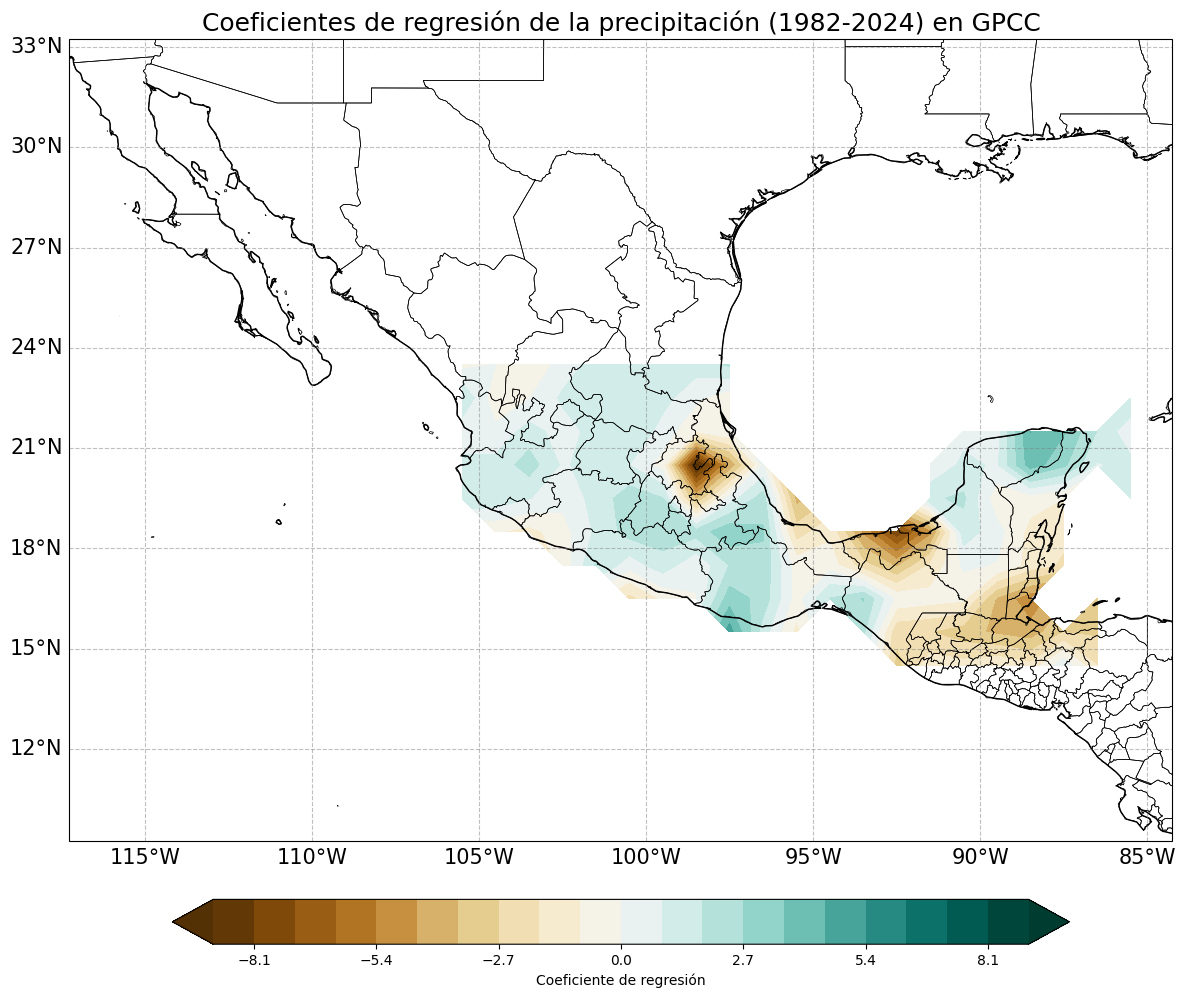

In [55]:
# ponemos el DataArray con coordenadas
matriz_m_da = xr.DataArray(coef_matriz_m, coords=[arealon.lat, arealon.lon], dims=["lat", "lon"])
#matriz_m_da.to_netcdf('coeficientes_regresion_GPCCV3_actualizado.nc')

# Configuramos levels
levels = np.linspace(-9, 9, 21) 

# Graficando la matriz de m´s 
mapa_MC(matriz_m_da*100, levels, 'BrBG', 'Coeficientes de regresión de la precipitación (1982-2024) en GPCC', 
        extend='both', lon_min=242.75, lon_max=275.75, lat_min=9.25, lat_max=33.25)